In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
#dataset=pd.read_csv("/content/drive/MyDrive/SNU Research/Tinnitus/Tinnitus_ALR&EEG_2022.08.18_final.csv")
 
dataset=pd.read_csv("/content/drive/MyDrive/Iqram Sir/Tinnitus_ALR&EEG_2022.08.26_final.csv")

classes = np.array(sorted(list(set(dataset.iloc[:, 1]))))

In [3]:
dataset.head()

,Subjects,SubjectTypeClass,TestType,n0_gap_peak_ms_20ms,p1_gap_peak_ms_20ms,n1_gap_peak_ms_20ms,p2_gap_peak_ms_20ms,n2_gap_peak_ms_20ms,p3_gap_peak_ms_20ms,n0_nogap_peak_ms_20ms,...,MeanP_Gamma_50ms,TotalEEGPower_50ms,RelativeAlpha_50ms,RelativeBeta_50ms,RelativeTheta_50ms,RelativeDelta_50ms,DTR_50ms,DTABR_50ms,ATR_50ms,ABR_50ms
0,'06_HSO_60_01',Control,Test,96,177,213,304,425,135,175,...,4.670000e-07,0.000055,0.0949,0.0372,0.387,0.481,1.240,6.57,0.245,2.55
1,'06_LSR_34_01',Control,Test,108,151,219,282,390,126,152,...,5.330000e-07,0.000047,0.1210,0.0500,0.419,0.410,0.979,4.83,0.290,2.43
2,'07_KHJ_33_02',Control,Test,123,195,246,275,456,99,166,...,2.890000e-05,0.000778,0.0805,0.0527,0.301,0.566,1.880,6.51,0.268,1.53
3,'08_LJS_26_01',Control,Test,98,163,212,320,416,134,197,...,5.990000e-07,0.000075,0.0885,0.0397,0.354,0.518,1.460,6.80,0.250,2.23
4,'09_JBH_58_01',Control,Test,127,166,206,271,386,119,153,...,8.390000e-07,0.000074,0.1090,0.0564,0.392,0.442,1.130,5.04,0.278,1.93


In [4]:
set(list(dataset['SubjectTypeClass']))

{'Control', 'Patient'}

In [5]:

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset.iloc[:, 1]=encoder.fit_transform(dataset.iloc[:, 1])

In [6]:
set(list(dataset['SubjectTypeClass']))

{0, 1}

#Feature Selection

In [7]:
X_ = dataset.iloc[:, 3:]
y_ = dataset.iloc[:, 1]

###Feature Selection (User Defined with Index Range)


*   Index- [245]  to  [274] -> EEG Features
*   Index- [4]    to  [243] -> Normal Features



In [94]:
def FS_UD_index(dataset):
  list_of_feat=["Subjects"]
  norm_start=int(input("Normal Features Start Index:"))
  norm_end=int(input("Normal Features End Index:"))
  eeg_start=int(input("EEG Features Start Index:"))
  eeg_end=int(input("EEG Features End Index:"))



  list_of_feat=list_of_feat+list(dataset.iloc[:0,norm_start:norm_end])+list(dataset.iloc[:0,eeg_start:eeg_end])
  return list_of_feat


###Feature Selection (User Defined with Individual Feature)

**Please Input 'Subject' colunm name first**

In [9]:

def FS_UD_feat():
  list_of_feat=["Subjects"]
  num=int(input("Input number of features: "))

  for i in range(num):
    print(i+1,".")
    list_of_feat.append(input("Feature Name: "))
  return list_of_feat


###Feature Selection (Model Free)

**Type-1**

In [10]:


def FS_bestfeatures_1(X_,y_):
  from sklearn.feature_selection import SelectKBest
  bestfeatures_1 = SelectKBest(k=10)
  fit = bestfeatures_1.fit(X_,y_)
  dfscores = pd.DataFrame(fit.scores_)
  dfcolumns = pd.DataFrame(X_.columns)
  featureScores = pd.concat([dfcolumns,dfscores],axis=1)
  featureScores.columns = ['Specs','Score']


  number_of_feat=int(input("Number Of Best Features: "))

  imp=featureScores.nlargest(number_of_feat,'Score')

  print(imp)
  list_of_feat=["Subjects"]

  for i in range(number_of_feat):
    list_of_feat.append(imp.iloc[:,0:1].values[i][0])


  return list_of_feat

**Type-2**

In [11]:


def FS_bestfeatures_2(X_,y_):
  from sklearn.feature_selection import SelectKBest,f_classif
  bestfeatures_2=SelectKBest(f_classif, k=10)
  fit = bestfeatures_2.fit(X_,y_)
  dfscores = pd.DataFrame(fit.scores_)
  dfcolumns = pd.DataFrame(X_.columns)
  featureScores = pd.concat([dfcolumns,dfscores],axis=1)
  featureScores.columns = ['Specs','Score']


  number_of_feat=int(input("Number Of Best Features: "))

  imp=featureScores.nlargest(number_of_feat,'Score')

  print(imp)
  list_of_feat=[]

  for i in range(number_of_feat):
    list_of_feat.append(imp.iloc[:,0:1].values[i][0])

  return list_of_feat

**Type-3**

In [12]:


def FS_bestfeatures_3(X_,y_):
  from sklearn.feature_selection import SelectFpr, f_classif

  bestfeatures_3=SelectFpr(f_classif, alpha=0.1)
  fit = bestfeatures_3.fit(X_,y_)
  dfscores = pd.DataFrame(fit.scores_)
  dfcolumns = pd.DataFrame(X_.columns)
  featureScores = pd.concat([dfcolumns,dfscores],axis=1)
  featureScores.columns = ['Specs','Score']

  number_of_feat=int(input("Number Of Best Features: "))

  imp=featureScores.nlargest(number_of_feat,'Score')
  
  print(imp)
  list_of_feat=[]

  for i in range(number_of_feat):
    list_of_feat.append(imp.iloc[:,0:1].values[i][0])

  return list_of_feat

###Feature Selection (Model Based)

In [13]:

def FS_model(X_, y_):
  number_of_feat=int(input("Number Of Best Features: "))

  from sklearn.feature_selection import SequentialFeatureSelector
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors=3)
  sfs = SequentialFeatureSelector(knn, n_features_to_select=number_of_feat)
  sfs.fit(X_, y_)
  list_of_feat=["Subjects"]
  list_of_feat=list(sfs.get_feature_names_out(list(dataset.iloc[:0,3:])))

  return list_of_feat

###Combine in a def

In [79]:
def Feat_Select(num,dataset,X_,y_):
  if num==1:
    return FS_UD_index(dataset)
  elif num==2:
    return FS_UD_feat()
  elif num==3:
    return FS_bestfeatures_1(X_,y_)
  elif num==4:
    return FS_bestfeatures_2(X_,y_)
  elif num==5:
    return FS_bestfeatures_3(X_,y_)
  elif num==6:
    return FS_model(X_, y_)

#Feature Selection Drop Down

In [81]:
import ipywidgets as widgets
from IPython.display import display

key=widgets.Dropdown(
    options=[('User Defined with Index Range', 1), ('User Defined with Individual Feature', 2),
             ('Model Free 1', 3),('Model Free 2',4),('Model Free 3',5),('Model Based:KNN',6)],
    value=2,
    description='Feture Select:',
)
display(key)


Dropdown(description='Number:', index=1, options=(('User Defined with Index Range', 1), ('User Defined with In…

In [95]:
list_of_feat=Feat_Select(key.value,dataset,X_,y_)

Normal Features Start Index:20
Normal Features End Index:28
EEG Features Start Index:220
EEG Features End Index:228


#Data Spliting

In [96]:
print(*list_of_feat,sep="\n")

Subjects
p1n1_interval_gap_20ms
p1p2_interval_gap_20ms
p1n2_interval_gap_20ms
p1p3_interval_gap_20ms
n1p2_interval_gap_20ms
n1n2_interval_gap_20ms
n1p3_interval_gap_20ms
p2n2_interval_gap_20ms
MeanP_Beta_20ms
MedianF_Beta_20ms
MeanF_Beta_20ms
SpectralEdge_Beta_20ms
PeakF_Beta_20ms
MeanP_Theta_20ms
MedianF_Theta_20ms
MeanF_Theta_20ms


In [128]:
X_new = dataset[list_of_feat]
y_new = dataset.iloc[:, 1]

print(X_new.shape)
print(y_new.shape)

X_train_with_subject=X_new.iloc[:108,:]  
X_test_with_subject=X_new.iloc[108:,:]
y_train=y_new.iloc[:108]
y_test=y_new.iloc[108:]



X_train = X_train_with_subject.iloc[:,1:]
X_test  = X_test_with_subject.iloc[:,1:]

print(X_train.shape)
print(X_test.shape[1])
result={}

(165, 17)
(165,)
(108, 16)
16




---





---



#ADABOOST

In [101]:
from sklearn.ensemble import AdaBoostClassifier

ada_defult = AdaBoostClassifier(random_state=0)
ada_defult.fit(X_train, y_train)
y_pred = ada_defult.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_defult,1,'AdaBoostClassifier')]=accuracy_score(y_test, y_pred)


[[13  6]
 [24 14]]
              precision    recall  f1-score   support

           0       0.35      0.68      0.46        19
           1       0.70      0.37      0.48        38

    accuracy                           0.47        57
   macro avg       0.53      0.53      0.47        57
weighted avg       0.58      0.47      0.48        57

Accurecy:  0.47368421052631576


1/200 round completed......................... Accurecy: 0.3157894736842105
2/200 round completed......................... Accurecy: 0.3333333333333333
3/200 round completed......................... Accurecy: 0.3684210526315789
4/200 round completed......................... Accurecy: 0.3684210526315789
5/200 round completed......................... Accurecy: 0.42105263157894735
6/200 round completed......................... Accurecy: 0.3684210526315789
7/200 round completed......................... Accurecy: 0.43859649122807015
8/200 round completed......................... Accurecy: 0.3157894736842105
9/200 round completed......................... Accurecy: 0.43859649122807015
10/200 round completed......................... Accurecy: 0.40350877192982454
11/200 round completed......................... Accurecy: 0.3684210526315789
12/200 round completed......................... Accurecy: 0.38596491228070173
13/200 round completed......................... Accurecy: 0.3684210526315789
14/

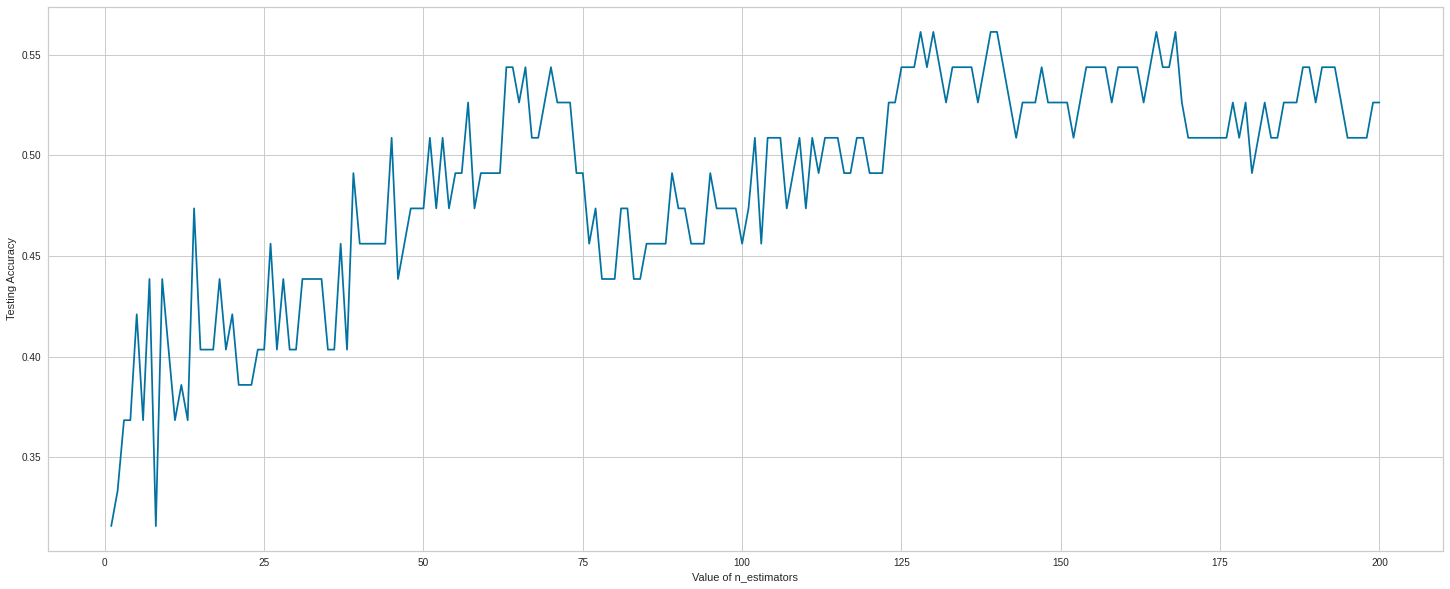

In [102]:
from sklearn.ensemble import AdaBoostClassifier
N=200
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = AdaBoostClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt
#plot the relationship between K and the testing accuracy
plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

In [103]:
from sklearn.ensemble import AdaBoostClassifier

ada_best_estimator = AdaBoostClassifier(n_estimators=best_estimator,random_state=0)
ada_best_estimator.fit(X_train, y_train)
y_pred = ada_best_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_best_estimator,1,'AdaBoostClassifier')]=accuracy_score(y_test, y_pred)

[[13  6]
 [19 19]]
              precision    recall  f1-score   support

           0       0.41      0.68      0.51        19
           1       0.76      0.50      0.60        38

    accuracy                           0.56        57
   macro avg       0.58      0.59      0.56        57
weighted avg       0.64      0.56      0.57        57

Accurecy:  0.5614035087719298




---



---



#Graddient Boosting

In [104]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

gradBoost_default = GradientBoostingClassifier(random_state=0)
gradBoost_default.fit(X_train, y_train)
y_pred = gradBoost_default.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_default,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[13  6]
 [25 13]]
              precision    recall  f1-score   support

           0       0.34      0.68      0.46        19
           1       0.68      0.34      0.46        38

    accuracy                           0.46        57
   macro avg       0.51      0.51      0.46        57
weighted avg       0.57      0.46      0.46        57

Accurecy:  0.45614035087719296


1/150 round completed......................... Accurecy: 0.3333333333333333
2/150 round completed......................... Accurecy: 0.3333333333333333
3/150 round completed......................... Accurecy: 0.3508771929824561
4/150 round completed......................... Accurecy: 0.3508771929824561
5/150 round completed......................... Accurecy: 0.3508771929824561
6/150 round completed......................... Accurecy: 0.2631578947368421
7/150 round completed......................... Accurecy: 0.2982456140350877
8/150 round completed......................... Accurecy: 0.3157894736842105
9/150 round completed......................... Accurecy: 0.3157894736842105
10/150 round completed......................... Accurecy: 0.2982456140350877
11/150 round completed......................... Accurecy: 0.3333333333333333
12/150 round completed......................... Accurecy: 0.3333333333333333
13/150 round completed......................... Accurecy: 0.3684210526315789
14/150 r

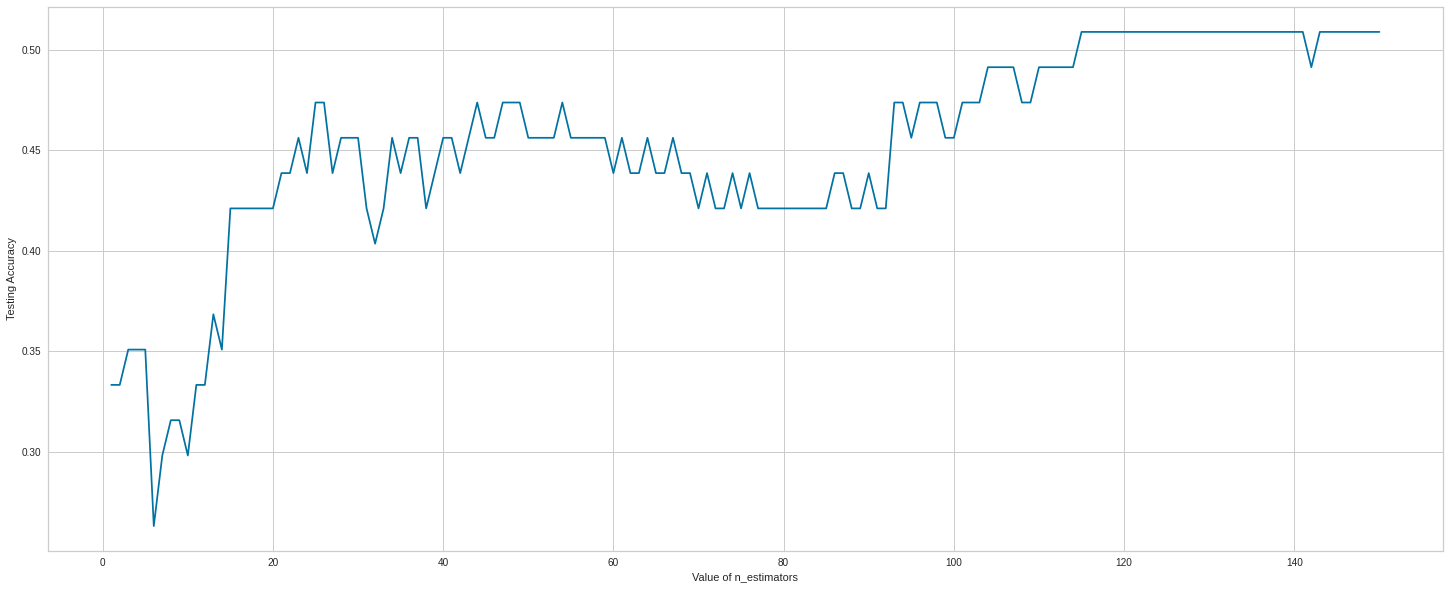

In [105]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/30 round completed......................... Accurecy: 0.38596491228070173
2/30 round completed......................... Accurecy: 0.40350877192982454
3/30 round completed......................... Accurecy: 0.45614035087719296
4/30 round completed......................... Accurecy: 0.47368421052631576
5/30 round completed......................... Accurecy: 0.45614035087719296
6/30 round completed......................... Accurecy: 0.47368421052631576
7/30 round completed......................... Accurecy: 0.42105263157894735
8/30 round completed......................... Accurecy: 0.3684210526315789
9/30 round completed......................... Accurecy: 0.3333333333333333
10/30 round completed......................... Accurecy: 0.3333333333333333
11/30 round completed......................... Accurecy: 0.3333333333333333
12/30 round completed......................... Accurecy: 0.3333333333333333
13/30 round completed......................... Accurecy: 0.3333333333333333
14/30 round co

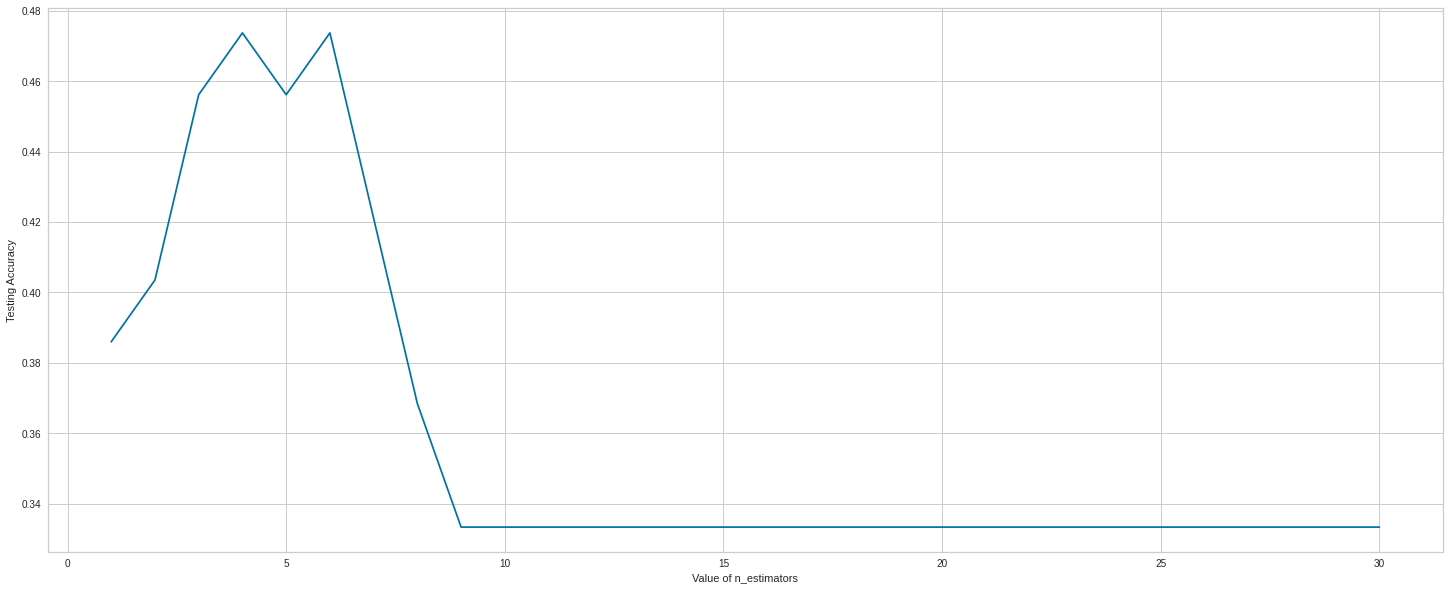

In [106]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [107]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_estimator = GradientBoostingClassifier(n_estimators=best_estimator,random_state=0)
gradBoost_estimator.fit(X_train, y_train)
y_pred = gradBoost_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_estimator,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[13  6]
 [22 16]]
              precision    recall  f1-score   support

           0       0.37      0.68      0.48        19
           1       0.73      0.42      0.53        38

    accuracy                           0.51        57
   macro avg       0.55      0.55      0.51        57
weighted avg       0.61      0.51      0.52        57

Accurecy:  0.5087719298245614


In [108]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_depth = GradientBoostingClassifier(max_depth=best_depth,random_state=0)
gradBoost_depth.fit(X_train, y_train)
y_pred = gradBoost_depth.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result[(gradBoost_depth,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[12  7]
 [23 15]]
              precision    recall  f1-score   support

           0       0.34      0.63      0.44        19
           1       0.68      0.39      0.50        38

    accuracy                           0.47        57
   macro avg       0.51      0.51      0.47        57
weighted avg       0.57      0.47      0.48        57

Accurecy:  0.47368421052631576


In [109]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_all = GradientBoostingClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
gradBoost_all.fit(X_train, y_train)
y_pred = gradBoost_all.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result[(gradBoost_all,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[12  7]
 [23 15]]
              precision    recall  f1-score   support

           0       0.34      0.63      0.44        19
           1       0.68      0.39      0.50        38

    accuracy                           0.47        57
   macro avg       0.51      0.51      0.47        57
weighted avg       0.57      0.47      0.48        57

Accurecy:  0.47368421052631576




---



---



#Random Forest

In [110]:
from sklearn.ensemble import RandomForestClassifier
rf_default = RandomForestClassifier(random_state=0)
rf_default.fit(X_train, y_train)
y_pred=rf_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_default,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[12  7]
 [29  9]]
              precision    recall  f1-score   support

           0       0.29      0.63      0.40        19
           1       0.56      0.24      0.33        38

    accuracy                           0.37        57
   macro avg       0.43      0.43      0.37        57
weighted avg       0.47      0.37      0.36        57

Accurecy:  0.3684210526315789


1/150 round completed......................... Accurecy: 0.47368421052631576
2/150 round completed......................... Accurecy: 0.3684210526315789
3/150 round completed......................... Accurecy: 0.42105263157894735
4/150 round completed......................... Accurecy: 0.3508771929824561
5/150 round completed......................... Accurecy: 0.3333333333333333
6/150 round completed......................... Accurecy: 0.3157894736842105
7/150 round completed......................... Accurecy: 0.42105263157894735
8/150 round completed......................... Accurecy: 0.38596491228070173
9/150 round completed......................... Accurecy: 0.40350877192982454
10/150 round completed......................... Accurecy: 0.40350877192982454
11/150 round completed......................... Accurecy: 0.42105263157894735
12/150 round completed......................... Accurecy: 0.42105263157894735
13/150 round completed......................... Accurecy: 0.42105263157894735

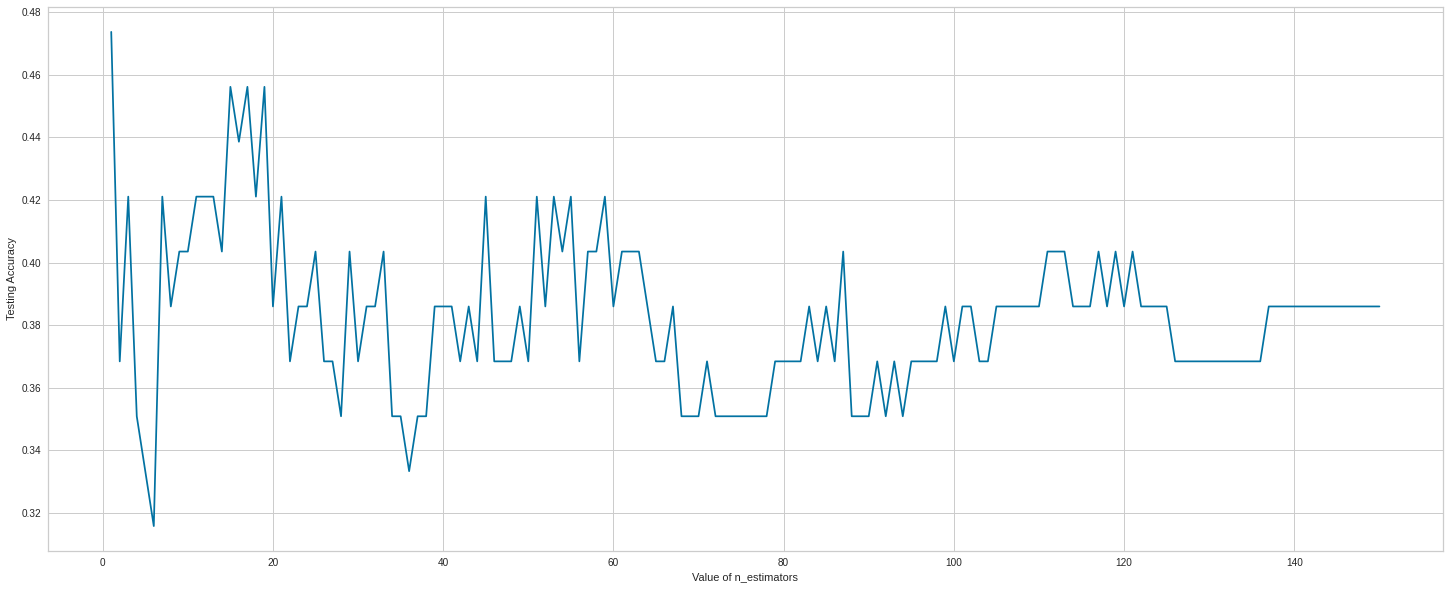

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/150 round completed......................... Accurecy: 0.3508771929824561
2/150 round completed......................... Accurecy: 0.38596491228070173
3/150 round completed......................... Accurecy: 0.3684210526315789
4/150 round completed......................... Accurecy: 0.38596491228070173
5/150 round completed......................... Accurecy: 0.3508771929824561
6/150 round completed......................... Accurecy: 0.3684210526315789
7/150 round completed......................... Accurecy: 0.3684210526315789
8/150 round completed......................... Accurecy: 0.3508771929824561
9/150 round completed......................... Accurecy: 0.3684210526315789
10/150 round completed......................... Accurecy: 0.3684210526315789
11/150 round completed......................... Accurecy: 0.3684210526315789
12/150 round completed......................... Accurecy: 0.38596491228070173
13/150 round completed......................... Accurecy: 0.3684210526315789
14/15

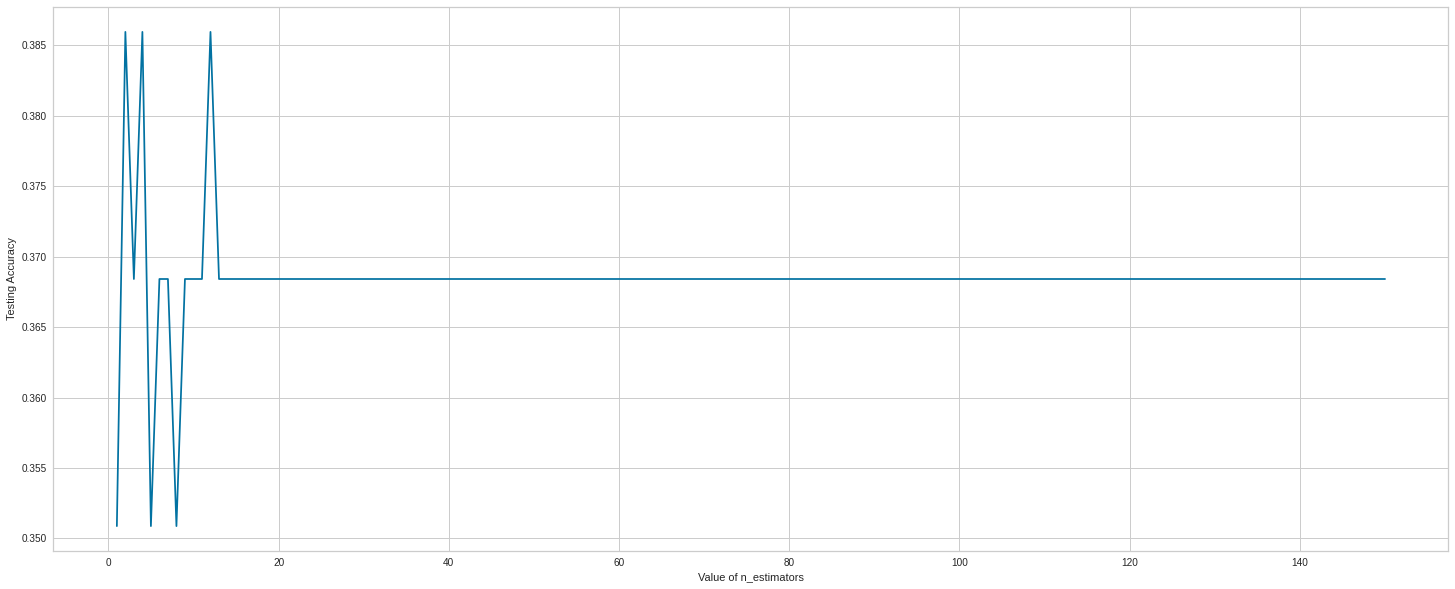

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [113]:
from sklearn.ensemble import RandomForestClassifier
rf_estimator = RandomForestClassifier(n_estimators=best_estimator,random_state=0)
rf_estimator.fit(X_train, y_train)
y_pred=rf_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_estimator,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[12  7]
 [23 15]]
              precision    recall  f1-score   support

           0       0.34      0.63      0.44        19
           1       0.68      0.39      0.50        38

    accuracy                           0.47        57
   macro avg       0.51      0.51      0.47        57
weighted avg       0.57      0.47      0.48        57

Accurecy:  0.47368421052631576


In [114]:
from sklearn.ensemble import RandomForestClassifier
rf_depth = RandomForestClassifier(max_depth=best_depth,random_state=0)
rf_depth.fit(X_train, y_train)
y_pred=rf_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_depth,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[17  2]
 [33  5]]
              precision    recall  f1-score   support

           0       0.34      0.89      0.49        19
           1       0.71      0.13      0.22        38

    accuracy                           0.39        57
   macro avg       0.53      0.51      0.36        57
weighted avg       0.59      0.39      0.31        57

Accurecy:  0.38596491228070173


In [115]:
from sklearn.ensemble import RandomForestClassifier
rf_all = RandomForestClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_all,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[13  6]
 [31  7]]
              precision    recall  f1-score   support

           0       0.30      0.68      0.41        19
           1       0.54      0.18      0.27        38

    accuracy                           0.35        57
   macro avg       0.42      0.43      0.34        57
weighted avg       0.46      0.35      0.32        57

Accurecy:  0.3508771929824561




---



---



#XGB

In [116]:


import xgboost as xgb
xgb_deafult = xgb.XGBClassifier(random_state=0)
xgb_deafult.fit(X_train,y_train)
y_pred = xgb_deafult.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_deafult,4,'xgboost')]=accuracy_score(y_test, y_pred)

[[13  6]
 [25 13]]
              precision    recall  f1-score   support

           0       0.34      0.68      0.46        19
           1       0.68      0.34      0.46        38

    accuracy                           0.46        57
   macro avg       0.51      0.51      0.46        57
weighted avg       0.57      0.46      0.46        57

Accurecy:  0.45614035087719296


1/250 round completed......................... Accurecy: 0.543859649122807
2/250 round completed......................... Accurecy: 0.5087719298245614
3/250 round completed......................... Accurecy: 0.5087719298245614
4/250 round completed......................... Accurecy: 0.43859649122807015
5/250 round completed......................... Accurecy: 0.45614035087719296
6/250 round completed......................... Accurecy: 0.3684210526315789
7/250 round completed......................... Accurecy: 0.40350877192982454
8/250 round completed......................... Accurecy: 0.42105263157894735
9/250 round completed......................... Accurecy: 0.45614035087719296
10/250 round completed......................... Accurecy: 0.43859649122807015
11/250 round completed......................... Accurecy: 0.40350877192982454
12/250 round completed......................... Accurecy: 0.38596491228070173
13/250 round completed......................... Accurecy: 0.42105263157894735


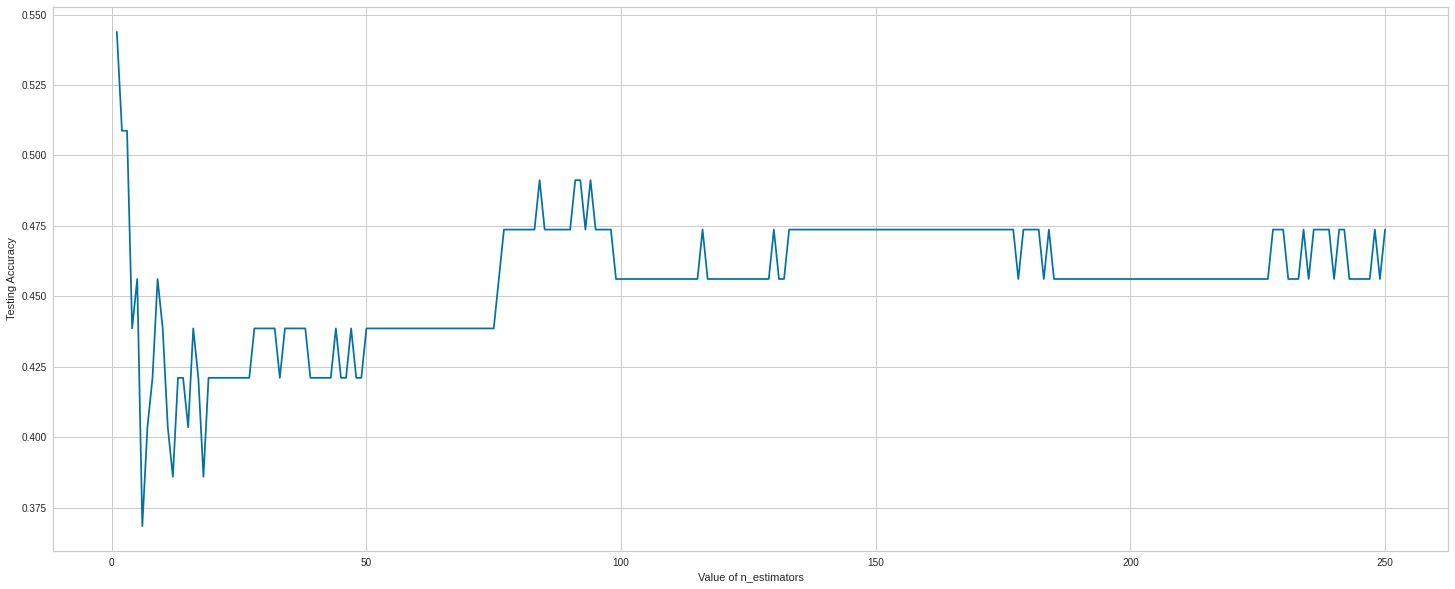

In [117]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(n_estimators=k,random_state=0)
  xgb_classifier.fit(X_train, y_train)
  y_pred=xgb_classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/250 round completed......................... Accurecy: 0.38596491228070173
2/250 round completed......................... Accurecy: 0.47368421052631576
3/250 round completed......................... Accurecy: 0.45614035087719296
4/250 round completed......................... Accurecy: 0.45614035087719296
5/250 round completed......................... Accurecy: 0.45614035087719296
6/250 round completed......................... Accurecy: 0.47368421052631576
7/250 round completed......................... Accurecy: 0.49122807017543857
8/250 round completed......................... Accurecy: 0.49122807017543857
9/250 round completed......................... Accurecy: 0.49122807017543857
10/250 round completed......................... Accurecy: 0.49122807017543857
11/250 round completed......................... Accurecy: 0.49122807017543857
12/250 round completed......................... Accurecy: 0.49122807017543857
13/250 round completed......................... Accurecy: 0.4912280701754

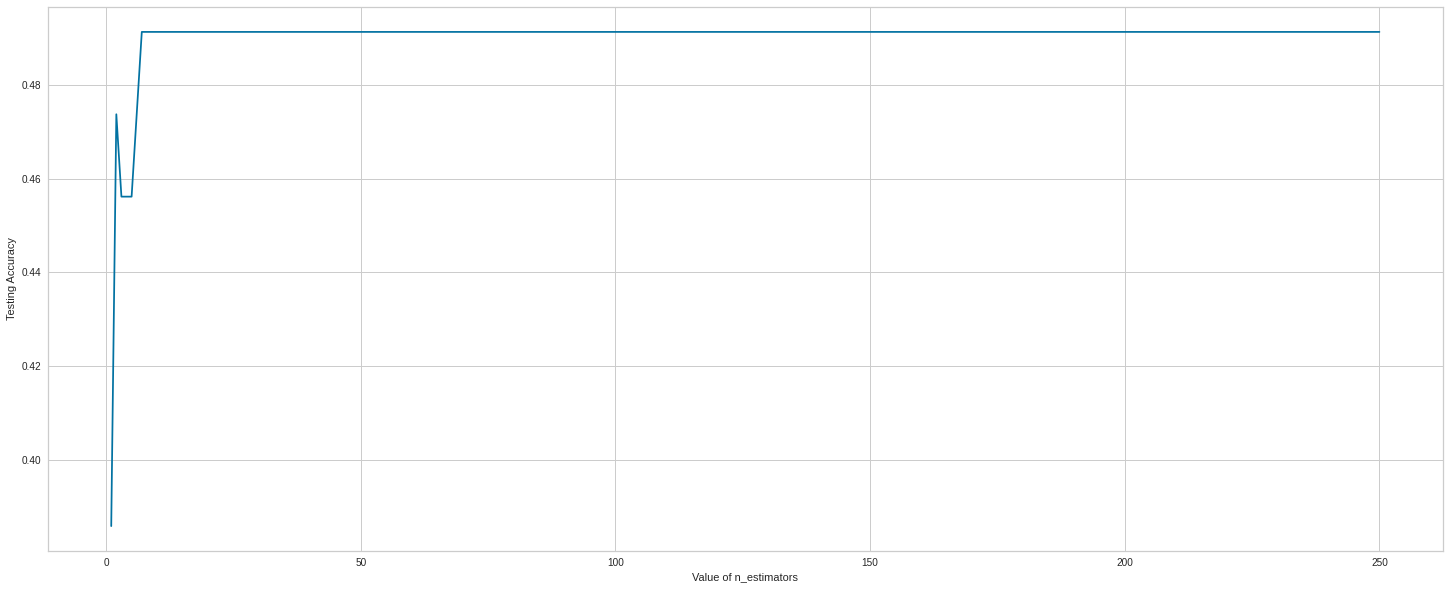

In [118]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(max_depth=k,random_state=0)
  xgb_classifier.fit(X_train, y_train)
  y_pred=xgb_classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [119]:
import xgboost as xgb
xgb_depth = xgb.XGBClassifier(max_depth=best_depth,random_state=0)
xgb_depth.fit(X_train,y_train)
y_pred = xgb_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_depth,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_depth)

[[13  6]
 [23 15]]
              precision    recall  f1-score   support

           0       0.36      0.68      0.47        19
           1       0.71      0.39      0.51        38

    accuracy                           0.49        57
   macro avg       0.54      0.54      0.49        57
weighted avg       0.60      0.49      0.50        57

Accurecy:  0.49122807017543857
XGBClassifier(max_depth=7)


In [120]:
import xgboost as xgb
xgb_estimator = xgb.XGBClassifier(n_estimators=best_estimator,random_state=0)
xgb_estimator.fit(X_train,y_train)
y_pred = xgb_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_estimator,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_estimator)

[[12  7]
 [19 19]]
              precision    recall  f1-score   support

           0       0.39      0.63      0.48        19
           1       0.73      0.50      0.59        38

    accuracy                           0.54        57
   macro avg       0.56      0.57      0.54        57
weighted avg       0.62      0.54      0.56        57

Accurecy:  0.543859649122807
XGBClassifier(n_estimators=1)


In [121]:
import xgboost as xgb
xgb_all = xgb.XGBClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
xgb_all.fit(X_train,y_train)
y_pred = xgb_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_all,4,'xgboost')]=accuracy_score(y_test, y_pred)

[[12  7]
 [17 21]]
              precision    recall  f1-score   support

           0       0.41      0.63      0.50        19
           1       0.75      0.55      0.64        38

    accuracy                           0.58        57
   macro avg       0.58      0.59      0.57        57
weighted avg       0.64      0.58      0.59        57

Accurecy:  0.5789473684210527


#KNN

In [122]:
from sklearn.neighbors import KNeighborsClassifier
knn_default = KNeighborsClassifier()
knn_default.fit(X_train, y_train)
y_pred=knn_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(knn_default,5,'KNeighborsClassifier')]=accuracy_score(y_test, y_pred)

[[18  1]
 [27 11]]
              precision    recall  f1-score   support

           0       0.40      0.95      0.56        19
           1       0.92      0.29      0.44        38

    accuracy                           0.51        57
   macro avg       0.66      0.62      0.50        57
weighted avg       0.74      0.51      0.48        57

Accurecy:  0.5087719298245614


1/105 round completed......................... Accurecy: 0.38596491228070173
2/105 round completed......................... Accurecy: 0.3333333333333333
3/105 round completed......................... Accurecy: 0.47368421052631576
4/105 round completed......................... Accurecy: 0.43859649122807015
5/105 round completed......................... Accurecy: 0.5087719298245614
6/105 round completed......................... Accurecy: 0.47368421052631576
7/105 round completed......................... Accurecy: 0.5087719298245614
8/105 round completed......................... Accurecy: 0.42105263157894735
9/105 round completed......................... Accurecy: 0.45614035087719296
10/105 round completed......................... Accurecy: 0.38596491228070173
11/105 round completed......................... Accurecy: 0.42105263157894735
12/105 round completed......................... Accurecy: 0.3508771929824561
13/105 round completed......................... Accurecy: 0.3508771929824561


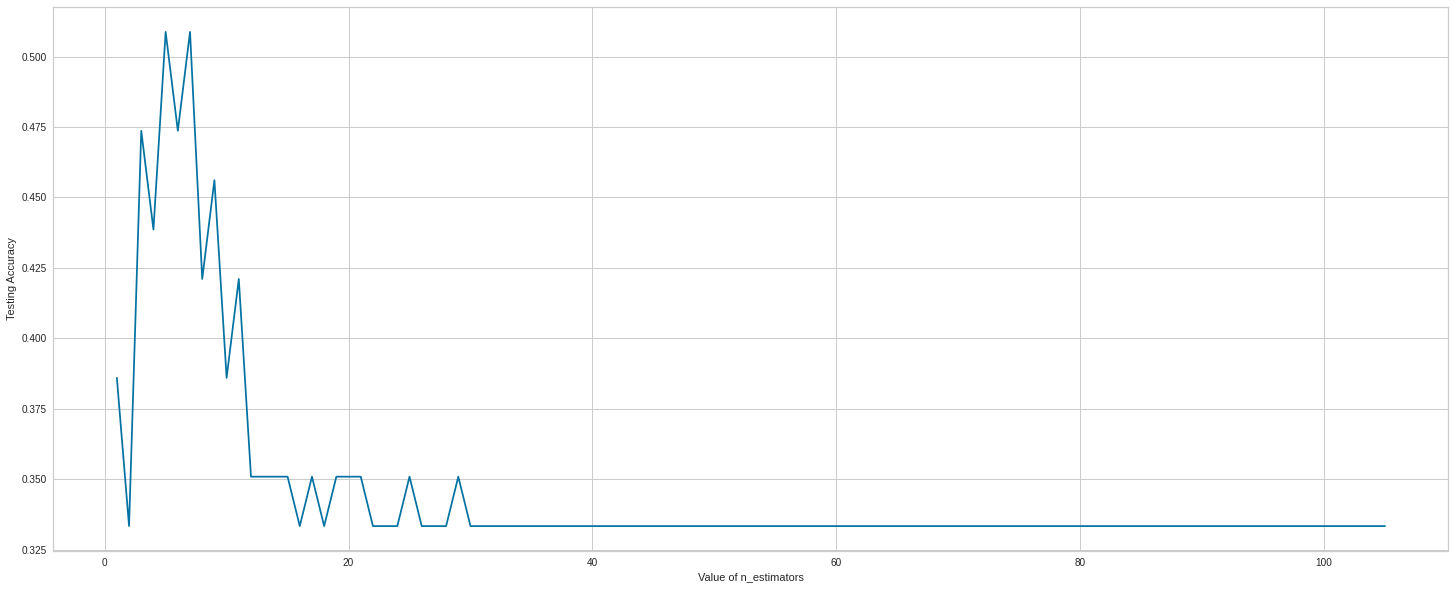

In [123]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
Neighbors=105
k_range = range (1,Neighbors+1)
scores={}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred=knn.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(Neighbors)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best=list(scores.keys())[scores_list.index(max(scores_list))]
print(best)

In [124]:
from sklearn.neighbors import KNeighborsClassifier
knn_neighbors = KNeighborsClassifier(n_neighbors=best)
knn_neighbors.fit(X_train, y_train)
y_pred=knn_neighbors.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(knn_neighbors,5,'KNeighborsClassifier')]=accuracy_score(y_test, y_pred)

[[18  1]
 [27 11]]
              precision    recall  f1-score   support

           0       0.40      0.95      0.56        19
           1       0.92      0.29      0.44        38

    accuracy                           0.51        57
   macro avg       0.66      0.62      0.50        57
weighted avg       0.74      0.51      0.48        57

Accurecy:  0.5087719298245614


#NB

In [125]:
from sklearn.naive_bayes import GaussianNB

nb_deafult = GaussianNB()
nb_deafult.fit(X_train, y_train)
y_pred = nb_deafult.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(nb_deafult,6,'GaussianNB')]=accuracy_score(y_test, y_pred)

[[17  2]
 [28 10]]
              precision    recall  f1-score   support

           0       0.38      0.89      0.53        19
           1       0.83      0.26      0.40        38

    accuracy                           0.47        57
   macro avg       0.61      0.58      0.47        57
weighted avg       0.68      0.47      0.44        57

Accurecy:  0.47368421052631576




---



---



#ANN

In [129]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(250, input_shape=(X_test.shape[1],), activation='relu'), # input laye
    keras.layers.Dense(150, activation='sigmoid'),
    keras.layers.Dense(75, activation='softmax')                    # output layer
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=200)

model.evaluate(X_test, y_test)

Epoch 1/200
4/4 [==============================] - 0s 5ms/step - loss: 3.5983 - accuracy: 0.0000e+00
Epoch 2/200
4/4 [==============================] - 0s 5ms/step - loss: 2.4382 - accuracy: 0.5833
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 1.7934 - accuracy: 0.6296
Epoch 4/200
4/4 [==============================] - 0s 5ms/step - loss: 1.3949 - accuracy: 0.6296
Epoch 5/200
4/4 [==============================] - 0s 5ms/step - loss: 1.1169 - accuracy: 0.6296
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 0.9259 - accuracy: 0.6481
Epoch 7/200
4/4 [==============================] - 0s 5ms/step - loss: 0.8160 - accuracy: 0.6667
Epoch 8/200
4/4 [==============================] - 0s 5ms/step - loss: 0.7507 - accuracy: 0.7037
Epoch 9/200
4/4 [==============================] - 0s 5ms/step - loss: 0.7172 - accuracy: 0.7222
Epoch 10/200
4/4 [==============================] - 0s 5ms/step - loss: 0.6846 - accuracy: 0.7130
Epoch 11/200
4/4 [=======

[0.871523380279541, 0.45614033937454224]

In [ ]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_predicted_labels))
print(classification_report(y_test,y_predicted_labels))
print("Accurecy: ",accuracy_score(y_test, y_predicted_labels))

#Result

In [130]:

models=[]

for i in result:
  models.append(i[0])
  print(i[0],i[1]," : ",result[i])
  print("---------------------------------------------------------------")
  print()


In [131]:
sorted_list=[]
sorted_list = sorted(result, key=result.get,reverse=True)

for i in sorted_list:
  print(i,"  : ",result[i])
  print("-------------------------------------------------------------------------------------------------")

print(sorted_list)


flage=[]
best_models=[]
it=0

for i in sorted_list:
  if it==4:
    break

  if i[1] not in flage:
    best_models.append((i[0],i[2]))
    flage.append(i[1])
    it+=1


[]


In [132]:
print("best_models:")
for i in best_models:
  print(i)


best_models:


In [133]:
len(best_models)

0

#Testing Accuracy For Best 4 Models

In [134]:

for i in best_models:
  print("--------------------------------------------------")
  print(i[0])
  y_pred=i[0].predict(X_train)
  print(confusion_matrix(y_train, y_pred))
  print(classification_report(y_train,y_pred))
  print("Accurecy: ",accuracy_score(y_train, y_pred))

#Model Check Box

In [135]:
def models_check_box(models):
  import ipywidgets as widgets
  from IPython.display import display
  new_keys=[]
  for i in models:
    i=widgets.Checkbox(
      value=False,
      description=str(i),
      disabled=False,
      indent=False
      )
    display(i)
    new_keys.append(i)
  return new_keys

#SHAP

In [136]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [137]:

def SHAP_EXP(model,graph_feat):
  print("Models: ",model)

  explainer = shap.Explainer(model.predict, X_test)

  shap_values1 = explainer(X_test)
  features_names=list_of_feat

  if 'Subjects' in features_names:
    features_names.pop(0)


  shap.plots.bar(shap_values1,max_display=graph_feat["max_display"])

  print("---------------------")

  shap.summary_plot(shap_values1,max_display=graph_feat["max_display"],feature_names=features_names)

  print("---------------------")

  print("Local Explaination")
  shap.plots.waterfall(shap_values1[graph_feat["shap_values Index"]],max_display=graph_feat["max_display"])


  print("---------------------")

  shap.plots.bar(shap_values1[graph_feat["shap_values Index"]],max_display=graph_feat["max_display"])

In [138]:
new_keys_7=models_check_box(models)

In [139]:
graph_feat={
    "max_display":20,
    "shap_values Index":2
}

for i in range(len(new_keys_7)):
  if new_keys_7[i].value ==True:
    SHAP_EXP(models[i],graph_feat)
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")

#Confusion Matrix For Training

In [140]:
new_keys_5=models_check_box(models)

In [141]:

for i in range(len(new_keys_5)):
  if new_keys_5[i].value ==True:
    cm = ConfusionMatrix(models[i], classes=classes)

    cm.fit(X_train, y_train)
    cm.score(X_train, y_train)
    cm.show()
    print("-------------------------------")
    print("-------------------------------")

#Confusion Matrix For Testing

In [142]:
new_keys_6=models_check_box(models)

In [143]:

from yellowbrick.classifier import ConfusionMatrix


for i in range(len(new_keys_6)):
  if new_keys_6[i].value ==True:
    cm = ConfusionMatrix(models[i], classes=classes)

    cm.fit(X_train, y_train)
    cm.score(X_test, y_test)
    cm.show()

#ROC Comparaing Machine Learning Models

In [144]:

def ROC(mod,X_t,y_t,graph_feat):
  r_probs = [0 for _ in range(len(y_t))]

  model_probs = []


  for i in mod:
    model_probs.append(i.predict_proba(X_t))


  model_probs2=[]

  for i in model_probs:
    model_probs2.append(i[:,1])


  from sklearn.metrics import roc_curve, roc_auc_score

  model_auc=[]
  r_auc = roc_auc_score(y_t, r_probs)

  for i in model_probs2:
    model_auc.append(roc_auc_score(y_t,i))


  fpr_tpr=[]
  r_fpr, r_tpr, _ = roc_curve(y_t, r_probs)

  for i in model_probs2:
    fpr, tpr, _ = roc_curve(y_t, i)
    fpr_tpr.append((fpr,tpr))

  import matplotlib.pyplot as plt
  plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)

  for i in range(len(model_auc)):
    plt.plot(fpr_tpr[i][0], fpr_tpr[i][1], marker='.', label=str(mod[i])+' (AUROC = %0.3f)' % model_auc[i])

  # Title
  plt.title(graph_feat["Title"],fontsize= graph_feat["Title Size"], fontweight=graph_feat["Title Fontweight"])
  plt.xlabel('False Positive Rate',fontweight=graph_feat["X axis Label Fontweight"],fontsize=graph_feat["X axis Label Font Size"])
  plt.ylabel('True Positive Rate',fontweight=graph_feat["Y axis Label Fontweight"],fontsize=graph_feat["Y axis Label Font Size"])
  
  plt.legend( 
           prop = {'size' : graph_feat["legend Font Size"]}, 
           loc = graph_feat["legend Position"])
  
  fig = plt.gcf()
  fig.set_size_inches(graph_feat["Fig Width (inches)"], graph_feat["Fig Height (inches)"])
  fig.savefig(graph_feat["Fig Saving Name"], dpi=graph_feat["dpi"])
  plt.show()

***Training ROC***<br>
Chosse the Models

In [145]:
new_keys_2=models_check_box(models)


Change  the given dictionary of graph feature for desire graph.

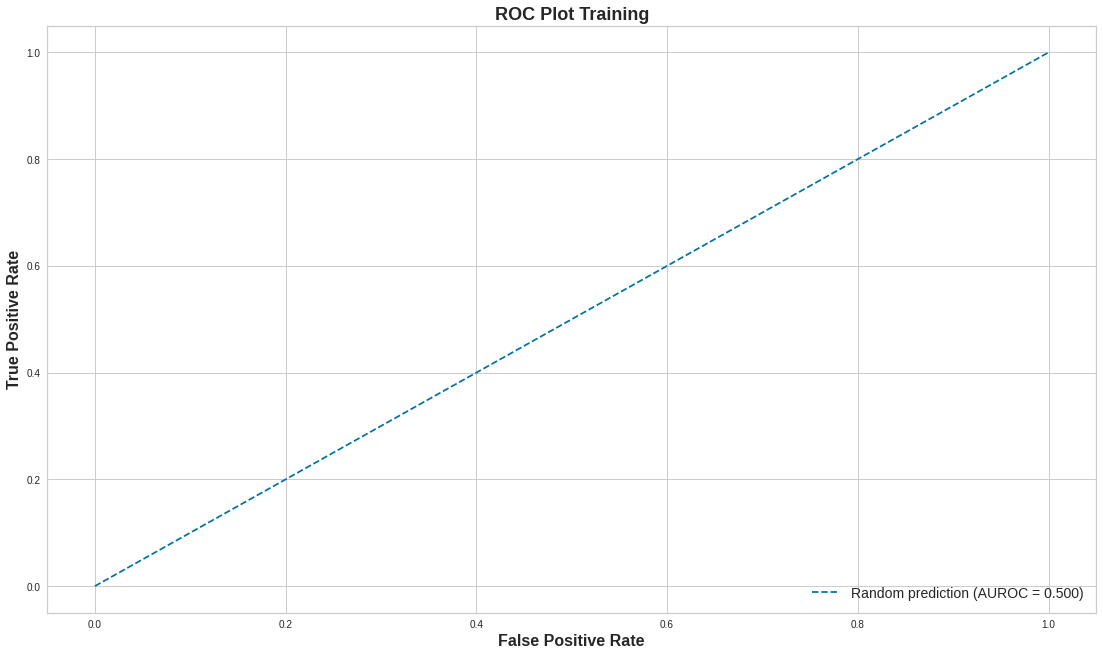

In [146]:
graph_feat={
    "Title" : "ROC Plot Training",
    "Title Size":18,
    "Title Fontweight":'bold',

    "legend Font Size": 14,
    "legend Position": "lower right",

    "X axis Label Font Size":16,
    "X axis Label Fontweight":'bold',

    "Y axis Label Font Size":16,
    "Y axis Label Fontweight":'bold',

    "Fig Height (inches)":10.8,
    "Fig Width (inches)":18.8,

    "Fig Saving Name": "ROC_training.png",
    "dpi":100
    

}

mod=[]
for i in range(len(new_keys_2)):
  if new_keys_2[i].value ==True:
    mod.append(models[i])

ROC(mod,X_train,y_train,graph_feat)



---



***Testing ROC***<br>
Chosse the Models

In [147]:
new_keys_3=models_check_box(models)


Change  the given dictionary of graph feature for desire graph.

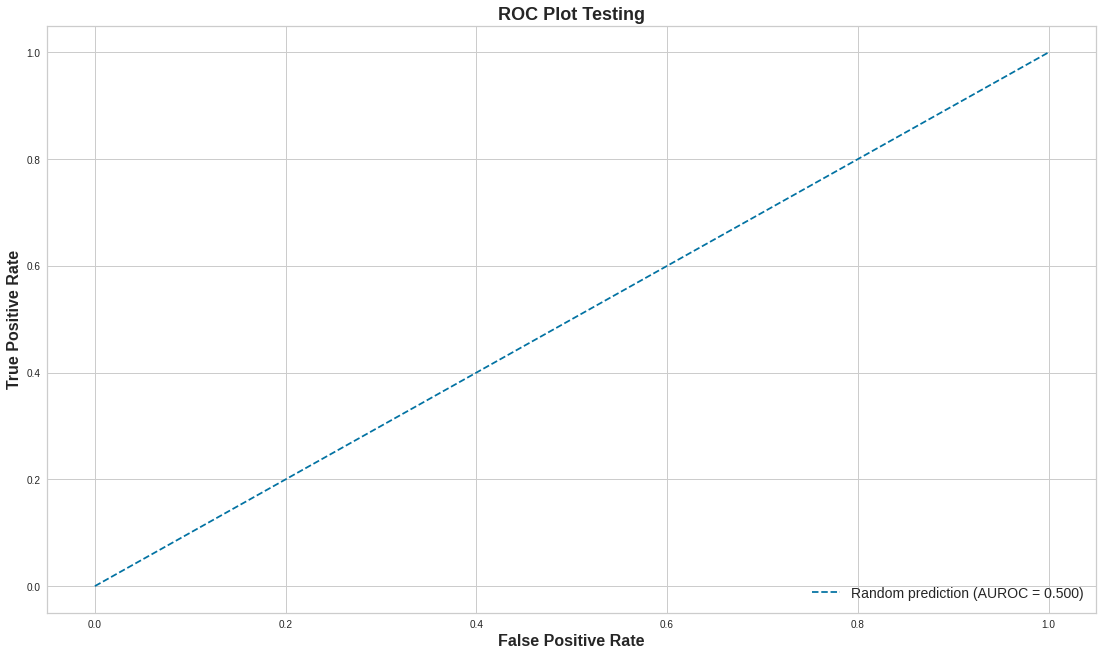

In [148]:
graph_feat={
    "Title" : "ROC Plot Testing",
    "Title Size":18,
    "Title Fontweight":'bold',

    "legend Font Size": 14,
    "legend Position": "lower right",

    "X axis Label Font Size":16,
    "X axis Label Fontweight":'bold',

    "Y axis Label Font Size":16,
    "Y axis Label Fontweight":'bold',

    "Fig Height (inches)":10.8,
    "Fig Width (inches)":18.8,

    "Fig Saving Name": "ROC_testing.png",
    "dpi":100

}

mod=[]
for i in range(len(new_keys_3)):
  if new_keys_3[i].value ==True:
    mod.append(models[i])

ROC(mod,X_test,y_test,graph_feat)

#Cross_val_score 





In [ ]:
from sklearn.model_selection import cross_val_score

k=5
for i in result:
  print(i[0]," -> Accuracy: ",result[i])
  l=list(cross_val_score(i[0],X_new.iloc[:,1:], y_new,cv=k))
  avg=sum(l)/k
  print(i[0]," -> AVG Accurecy After CV: "+str(avg)+ " (For "+str(k)+" Fold)")
  print("--------------------------------------------------------------------------")

#CV ROC

In [ ]:


def CV_ROC(model,folds,graph_feat):
  import matplotlib.pyplot as plt

  from sklearn import svm
  from sklearn.metrics import auc,roc_curve
  from sklearn.metrics import RocCurveDisplay
  from sklearn.model_selection import StratifiedKFold


  cv = StratifiedKFold(n_splits=folds)



  tprs = []
  aucs = []
  mean_fpr = np.linspace(0,1,100)
  i = 1
  for train,test in cv.split(X_new.iloc[:,1:], y_new.values):
      prediction = model.fit(X_new.iloc[:,1:].values[train], y_new.values[train]).predict_proba(X_new.iloc[:,1:].values[test])
      fpr, tpr, t = roc_curve(y_new.values[test], prediction[:, 1])
      tprs.append(np.interp(mean_fpr, fpr, tpr))
      roc_auc = auc(fpr, tpr)
      aucs.append(roc_auc)
      plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
      i= i+1

  plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
  mean_tpr = np.mean(tprs, axis=0)
  mean_auc = auc(mean_fpr, mean_tpr)
  plt.plot(mean_fpr, mean_tpr, color='blue',
          label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

  plt.title('CV-ROC-> '+str(model),fontsize= graph_feat["Title Size"], fontweight=graph_feat["Title Fontweight"])
  plt.xlabel('False Positive Rate',fontweight=graph_feat["X axis Label Fontweight"],fontsize=graph_feat["X axis Label Font Size"])
  plt.ylabel('True Positive Rate',fontweight=graph_feat["Y axis Label Fontweight"],fontsize=graph_feat["Y axis Label Font Size"])
  plt.legend( 
           prop = {'size' : graph_feat["legend Font Size"]}, 
           loc = graph_feat["legend Position"])
  
  fig = plt.gcf()
  fig.set_size_inches(graph_feat["Fig Width (inches)"], graph_feat["Fig Height (inches)"])
  fig.savefig(graph_feat["Fig Saving Name"], dpi=graph_feat["dpi"])
  plt.show()

In [ ]:
new_keys=models_check_box(models)

In [ ]:
# run this cell after selecting

graph_feat={
    "Title Size":18,
    "Title Fontweight":'bold',

    "legend Font Size": 14,
    "legend Position": "lower right",

    "X axis Label Font Size":16,
    "X axis Label Fontweight":'bold',

    "Y axis Label Font Size":16,
    "Y axis Label Fontweight":'bold',

    "Fig Height (inches)":10.8,
    "Fig Width (inches)":18.8,

    "Fig Saving Name": "ROC_testing.png",
    "dpi":100

}





k_fold=5

for i in range(len(new_keys)):
  if new_keys[i].value ==True:
    CV_ROC(models[i],5,graph_feat)
    print("-----------------------------------------------------------------")
    print("-----------------------------------------------------------------")

#Result CSV<br>
Predicted and Actual Row will be added at the end index

In [ ]:
def reverse_transfrom(my_list):
  for i in range(len(my_list)):
    if my_list[i] == 0:
      my_list[i] = 'Control'
    else:
      my_list[i] = 'Patient'
  return my_list

In [ ]:
new_keys_4=models_check_box(models)

In [ ]:
for i in range(len(new_keys_4)):
  if new_keys_4[i].value ==True:
    temp=X_test_with_subject

    prediction_cls = reverse_transfrom(list(models[i].predict(X_test[0:])))
    actual_cls = reverse_transfrom(list(y_test[0:]))

    temp["Actual"] = actual_cls
    temp["Predicted"] = prediction_cls

    temp.to_csv(str(models[i])+".csv")